In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Load the US Arrests dataset
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
### Data cleaning and exploration

In [4]:
state_num = df.shape[0]
feature_num = df.shape[1]

print("The number of states in the dataset: ", state_num)
print("The number of features in the dataset: ", feature_num)

The number of states in the dataset:  50
The number of features in the dataset:  5


In [5]:
# Names of the columns 
df.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [22]:
# Check column type
for col in df.columns:
    print(f"'{col}' column type is {df[str(col)].dtype}")

'City' column type is object
'Murder' column type is float64
'Assault' column type is int64
'UrbanPop' column type is int64
'Rape' column type is float64


In [ ]:
# All column contain continuous variables 

In [9]:
# Describe the statistical properties of the columns 
stats = df.describe()
select_stats = stats.loc[["mean","std","min","max"]].transpose()

select_stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


In [ ]:
# The 'mean' and 'std' for 'Assault' are significantly higher than 
# other variables which suggets that data should be scaled 

In [25]:
# Find any missing values 

# Count missing values
missing_values = df.isnull().sum()
missing_values


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [26]:
# There are no missing values 

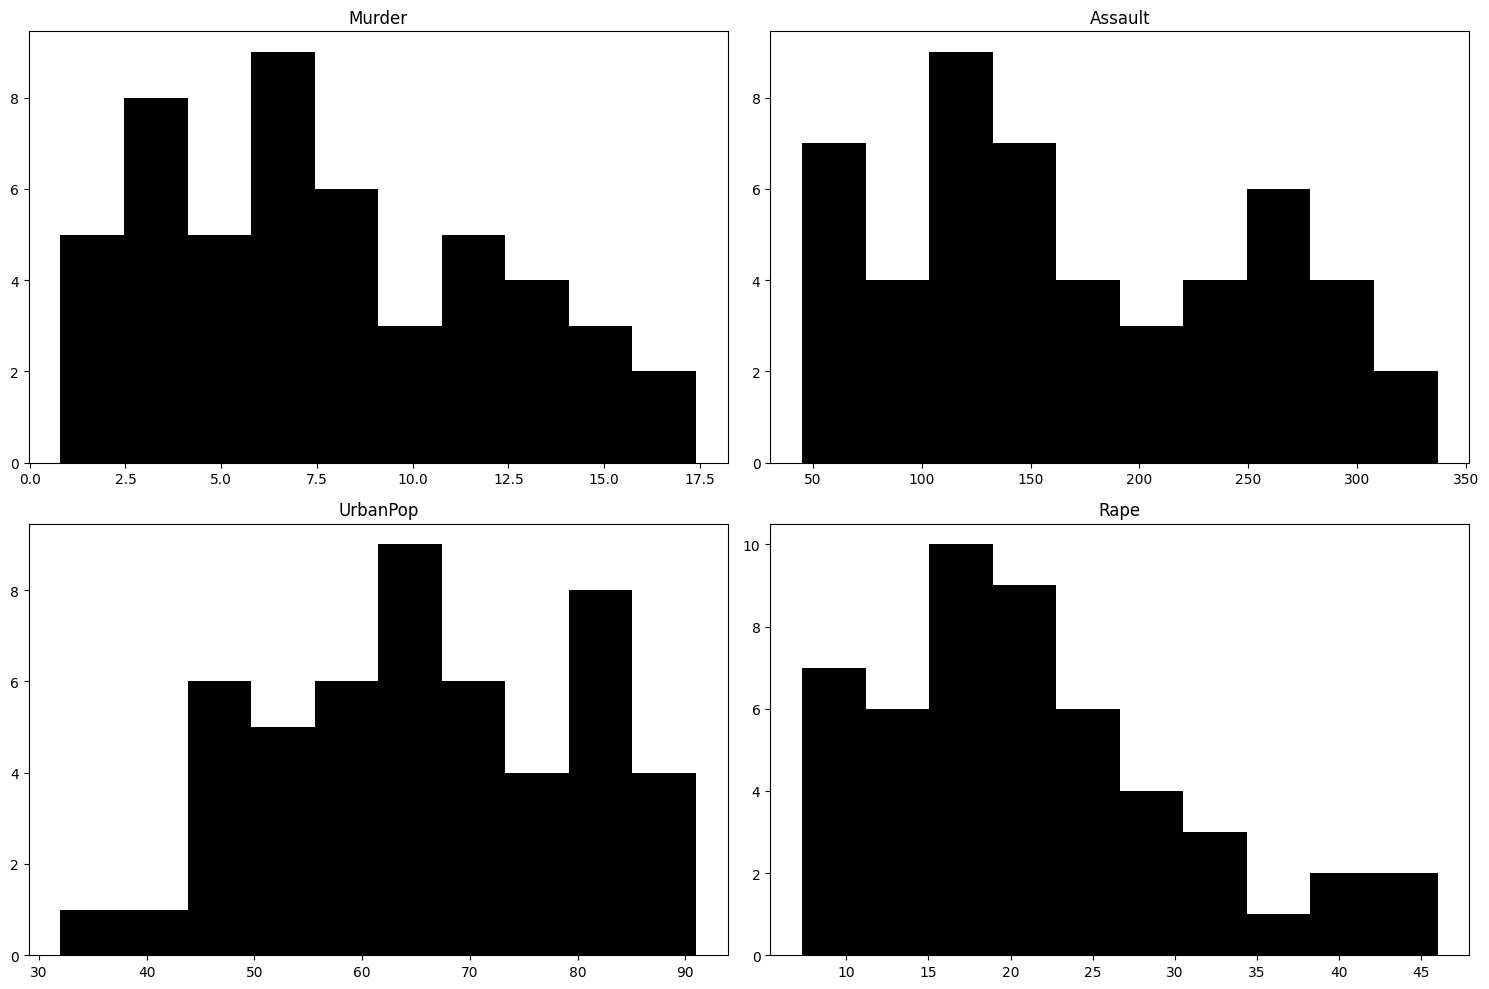

In [30]:
# Plot histograms for each data column to visualise observations for each feature
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

In [32]:
# Create a summary table

missing_df = pd.DataFrame(missing_values, columns=['missing'])

summary_df = pd.concat([missing_df, select_stats], axis=1)

summary_df

,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.788,4.355510,0.8,17.4
Assault,0,170.760,83.337661,45.0,337.0
UrbanPop,0,65.540,14.474763,32.0,91.0
Rape,0,21.232,9.366385,7.3,46.0


In [ ]:
### More data exploration

In [45]:
# Cities with that are top 5 in murders 
sorted_murders = df.sort_values('Murder', ascending=False)[['City', 'Murder']]
sorted_murders.head(5)

,City,Murder
9,Georgia,17.4
23,Mississippi,16.1
8,Florida,15.4
17,Louisiana,15.4
39,South Carolina,14.4


In [46]:
# Cities with that are top 5 in assault 
sorted_assault = df.sort_values('Assault', ascending=False)[['City', 'Assault']]
sorted_assault.head(5)

,City,Assault
32,North Carolina,337
8,Florida,335
19,Maryland,300
2,Arizona,294
30,New Mexico,285


In [47]:
# Cities with that are top 5 in rape 
sorted_rape = df.sort_values('Rape', ascending=False)[['City', 'Rape']]
sorted_rape.head(5)

,City,Rape
27,Nevada,46.0
1,Alaska,44.5
4,California,40.6
5,Colorado,38.7
21,Michigan,35.1


In [48]:
# Cities with that are top 5 in percentage of population living in urban areas
sorted_pop = df.sort_values('UrbanPop', ascending=False)[['City', 'UrbanPop']]
sorted_pop.head(5)

,City,UrbanPop
4,California,91
29,New Jersey,89
38,Rhode Island,87
31,New York,86
20,Massachusetts,85


<AxesSubplot: >

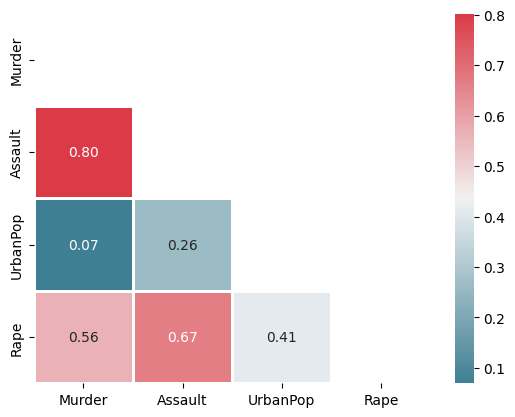

In [61]:
### Correlation analysis

import seaborn as sns

# Generate a colormap
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Get correlations
corr_df = df.drop(columns=['City']).corr()

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corr_df)
dropSelf[np.triu_indices_from(dropSelf)] = True

# Generate heatmap with annotations of the correlation strength and 2 decimal floats 
sns.heatmap(corr_df, cmap=colormap, mask=dropSelf, annot=True, fmt=".2f", linewidth=2)

In [63]:
# There is a strong linear positive correlation between
# Assault and murder according to the above heatmap

# This may be an intuitive correlation as these crimes are both of a 
# violent nature so when the assault is high in violent areas, murder
# is also likely to be high 

# Data exploration also shows that the numbers for assault are on a far larger scale
# than the numbers for the other features so it would be expected that this would 
# have a large effect on the data 

In [64]:
### Primary Component Analysis - Unstandardised data 

In [72]:
from sklearn.decomposition import PCA

# Isolate the columns containing the features 
x = df.drop(["City"],axis=1).values.squeeze()

pca = PCA()

# Apply dimensional reduction to the features and store in dataframe 
x_trans = pca.fit_transform(x)
df_pca = pd.DataFrame(x_trans)

df_pca.head()

,0,1,2,3
0,64.802164,11.448007,-2.494933,2.407901
1,92.827450,17.982943,20.126575,-4.094047
2,124.068216,-8.830403,-1.687448,-4.353685
3,18.340035,16.703911,0.210189,-0.520994
4,107.422953,-22.520070,6.745873,-2.811826


In [73]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [74]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [75]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [76]:
# The above calculations show that the first principal component has 
# by far the largest standard deviation

# The first principal component also explains the largest proportion of the variance
# as we would intuit from the standard deviation 

In [90]:
labels = corr_df.columns
cities = df.City.values

In [87]:
# Function adapted from example_plots in task folder 
# Function generates a biplot 
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

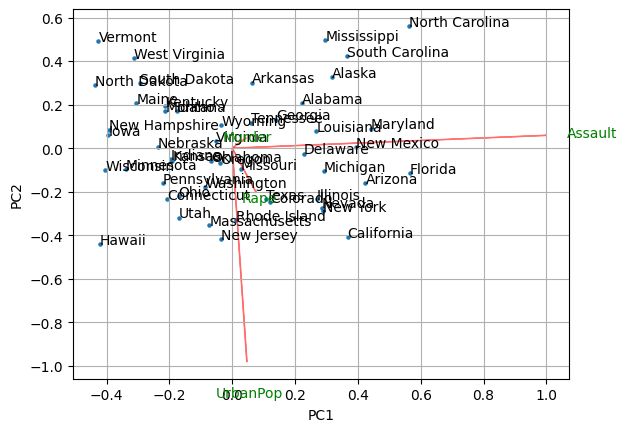

In [86]:
biplot(x_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

In [88]:
# The above biplot shows that Assault and Urban Population are the most important
# features as these arrows dominate the biplot

# Assault dominates the first primary component
# UrbanPop dominates the second primary component

# North Carolina has the highest figure for assault as was shown in the data exploration
# Much of the variance is explained by PC1

In [ ]:
### Standardise the data 

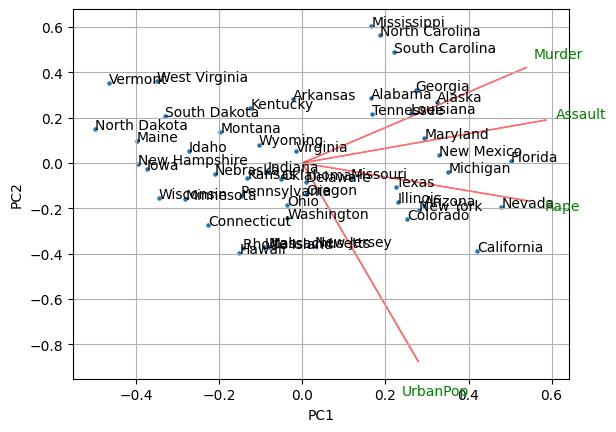

In [102]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardise the features using StandardScaler
# (No difference in appearance of biplot whether using StandardScaler vs MinMaxScaler )
x_std = StandardScaler().fit_transform(x)

# Create PCA object and apply dimensional reduction to scaled data 
std_pca = PCA()
x_std_trans = std_pca.fit_transform(x_std)

# Create dataframe from scaled standardised data 
df_std_pca = pd.DataFrame(x_std_trans)

# Generate a biplot of scaled standardised data
biplot(x_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

In [ ]:
# The above biplot shows by means of PC1 that Murder, Assault and Rape
# all have positive loading values and therefore PC1 seems to summarise
# crimes of a violent nature

# All the features in the dataset are similar and therefore in the same direction

# Countries high in Murder also tend to be high in rape and assault 

# The feature for UrbanPop is not as positively correlated as the other features
# This one has quite a weak correlation with the other features comparatively
# UrbanPop is more important in PC2 than the other features 

Text(0.5, 1.0, 'Cumulative Explained Variance')

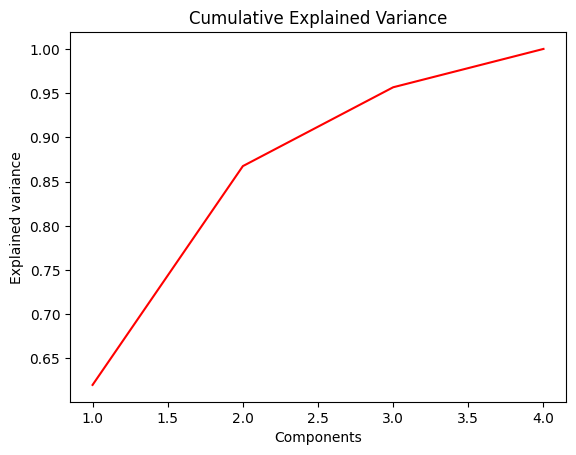

In [104]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

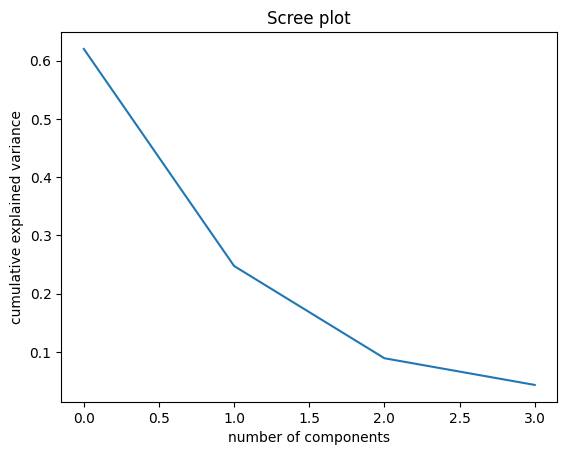

In [105]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

In [106]:
# The first 2 components explain approx 90% of the variance 

In [107]:
### Cluster analysis

In [108]:
# Hierachical clustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [124]:
# Create a dataframe from the first 2 components of the primary component analysis
pca_df = pd.DataFrame(x_std_trans[:,0:3], index = df['City'])
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


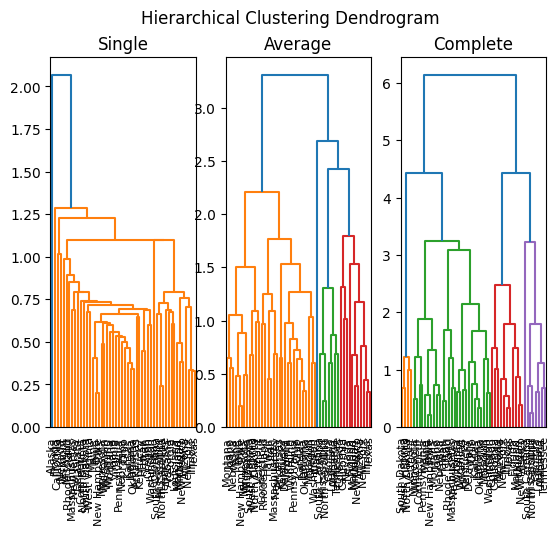

In [125]:
# Generate Hierachical clustering dendrograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
figsize = ([20, 20])
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) 
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

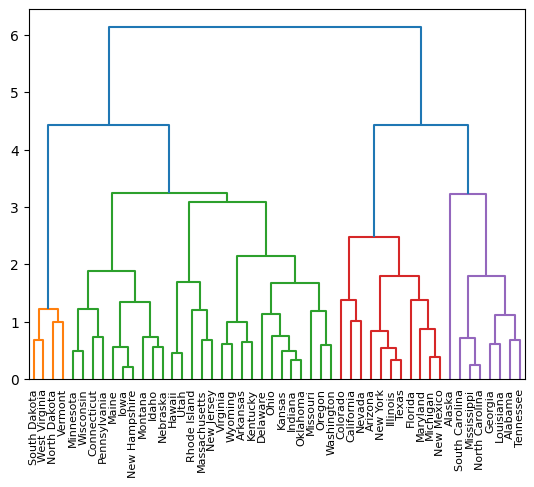

In [127]:
# The complete linkage method creates the most balanced dispersion of clusters 
# Will look at this one closer 

complete = dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)

In [128]:
# Georgia, Mississipi, North Carolina and Louisiana appear 
# to be grouped together as these states all appear in the top 5 lists for
# murders and assaults and as the two are positively correlated, it 
# makes sense that states like these would be grouped together
# Another thing to note is that these are mostly all southern states and 
# therefore it suggets that the south may be a more unsage place to live 

In [129]:
### K-means 

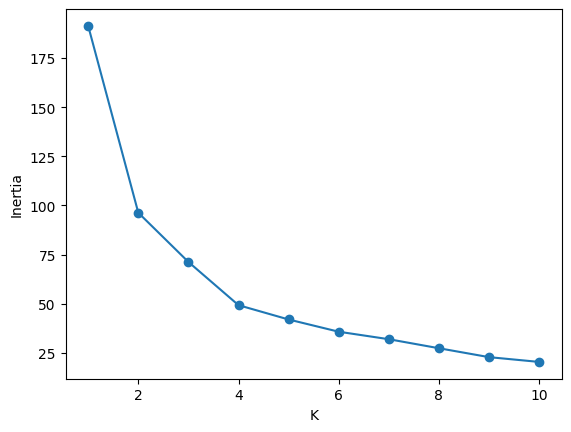

In [132]:
from sklearn.cluster import KMeans

# Elbow method for finding appropriate value of K for Kmeans clustering
def eval_Kmeans(x, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10):
    within_cluster_vars = [eval_Kmeans(x, k) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(pca_df)

In [133]:
# Elbow method seems to suggest that 4 would be the best value for k and this 
# is confirmed upon visual inspection of the hierachical clustering
# The data seems to be seperated into 4 distinct clusters 

In [140]:
# Plot clusters 

# Extract the first two components to plot (First two components responsible for approx 90% of variance)
x_kmeans = x_std_trans[:, 0]
y_kmeans = x_std_trans[:, 1]

# Fit K-means 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_


Text(0, 0.5, 'Dim 1')

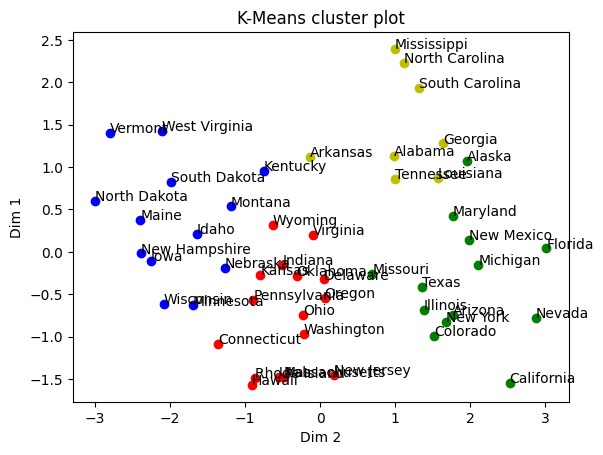

In [149]:
# Plot clusters

fig, ax = plt.subplots()
colours = 'rgby'

for i in range(0, 4):
    plt.scatter(x_kmeans[cluster_labels == i], y_kmeans[cluster_labels == i], c = colours[i])
    
for i in range(0,len(x)):
    txt = cities[i]
    ax.annotate(txt, (x_kmeans[i], y_kmeans[i]))
    
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

In [ ]:
# Clusters in K-Means generally seem to mirror the clusters in the hierachical clustering 
# There is no obvious association in the clusters in teams of geography
# It may be said that the southern states are mostly clustered together but for the 
# rest of them it appears that they are quite spread out in terms of geography
# within the clusters

# Perhaps the only commonality between states may be the size of the states? 